In [2]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os.path as osp
import os
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import skimage.io
import numpy as np
from collections import Counter
import os
import os.path as osp
import shutil
from sklearn.model_selection import train_test_split

# 读取图片的方式以及
市面上有很多图片读取的软件包和工具,每个都有其独特的方法和规则,下面我们就来研究一下

## PIL
`Image.open(filePath)`图片读取,读取后的图片格式为相应的PIL类,图像数据格式为(Height,Width,Channels)
`PIL_Image_object.show()`自带图像显示功能,会弹窗显示

In [8]:
import cv2
t = cv2.imread('scream.jpg')
cv2.imwrite('save_img.jpg', t)

True

In [3]:
img_path = 'scream.jpg'
pil_img = Image.open(img_path).convert('L')#打开图像,并转换为灰度图像
width, height = pil_img.size#读取图片的尺寸,不包含通道
print('image size:', pil_img.size, 'image format:', pil_img.format)#

image size: (352, 448) image format: None


## PIL与numpy数据格式转换
**PIL->numpy**<br>
`np.array(PIL_image object)`可以强制进行转换为np的数据<br>
**numpy->PIL**<br>
`Image.fromarray(img)`使用这个函数,可以将图像的numpy数组强行转换为PIL<br>

PIL存储图像
`PIL_Image_Object.save(file_path)`,PIL创建的图片对象类自带save保存功能

## PIL 图像增强技术
`from PIL import ImageEnhance`这个库中有很多图像增强的工具

from PIL import ImageEnhance, 这里面的工具相当于一个wraper,传入Image对象后,得到一个控制工具<br>
`ImageEnhance.Brightness(PIL_Image_Object)`<br>
`ImageEnhance.Contrast()`调整对比度<br>
`ImageEnhance.ImageFilter()`<br>
`ImageEnhance.Sharpness()`<br>
`ImageEnhance.Color()`<br>
`img.point(f)`对Image进行像素级操作<br>
**使用Enhance相应的包裹器包裹之后的对象,具有`enchance`方法,在下一步自我调用enchance方法,()中是参数,返回给一个对象完成了增强效果,该对象为PIL_Image_Object类**

In [41]:
a = set([1,2,3])
b = set([1,2,3,4,5])
len(list(a & b)

[1, 2, 3]

In [43]:
set(np.array([1,2,3,4,5]))

{1, 2, 3, 4, 5}

In [26]:
file_path = '/home/wdd/image/'
save_path = '/home/wdd/image_enhance/'#最后面一定要加一根右斜杠
for img in os.listdir(file_path):
    img_path = osp.join(file_path, img)
#     print(img_path)
    from PIL import ImageEnhance
    t = Image.open(img_path)
    sharp = ImageEnhance.Contrast(t)#包裹PIL图像对象,返回一个具备自我增强本领的对象
    sharp = sharp.enhance(1.4)#     print(img_path[-4:])#经常看到[-4:]就是最后四位的字符,其实就是图像的后缀名!!!
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    print(save_path+img)#
    sharp.save(save_path+img)#存储的位置经常容易弄错,一定要注意仔细检查!!!!是否需要osp.join()路径,否则就出错!!!!

/home/wdd/image_enhance/170908_061541605_Camera_6.jpg
/home/wdd/image_enhance/171206_033701856_Camera_5.jpg


## PIL通道分离
`r, g, b = img.split()`分离rgb通道,返回都是Image类型,img是Image对象
`Image.merge('RGB',(r,g,b))`返回合并通道的图像

# skimage
`skimage.io.imread(path)`读取后的图像可以保留原始的数据,输出结果保存为`ndarry`格式<br>
`skimage.io.imsave(path, image)`

In [4]:
import skimage.io
import cv2
import numpy as np

In [13]:
# ccf = cv2.imread('.jpg')
cv2.imwrite('ccf2.jpg', ccf)#cv2存储jpg不会降低质量!

True

In [1]:
import os.path as osp
import os

In [42]:
for i in os.walk(path):
    print(i)

In [1]:
import cv2
img = cv2.imread('ccf.jpg', cv2.COLOR_BGR2GRAY)
plt.imshow(img)
# newimg=cv2.equalizeHist(img)


NameError: name 'plt' is not defined

In [3]:
def get_train_name(image_name):
    train_name = image_name[:-16]
    train_name += '.jpg'
    return train_name

def apply_mask(image, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image


color_map = {0:100, 1:200, 2:300 }
data_path = '/home/wdd/cvpr-2018-autonomous-driving-autopilot-solution/data/aug_dir'
for i in os.listdir(osp.join(data_path, 'train_label')):
    path = osp.join(data_path, 'train_label')#此处明星的第一个path如果与上面的path重名,会造成多次赋值
    image_name = osp.join(path, i)
    img = skimage.io.imread(image_name)
    instances = np.unique(img)
    instance_num = len(instances)
    class_ids = np.zeros(instance_num)
    mask_out = np.zeros((img.shape[0], img.shape[1], instance_num))
    for i in range(instance_num):#从每个位置进行索引
        class_ids[i] = np.floor(instances[i]/1000).astype(int)
        mask_out[:,:,i] = (img == instances[i])
        if instances[i]/1000 in [38, 40]:
#             img += 100* mask_out[...,i].astype(np.uint16)
            train_path = osp.join(data_path, 'train_color')
            train_image_name = osp.basename(get_train_name(image_name))
            train_image_name = osp.join(train_path, train_image_name)
            train_image = cv2.imread(train_image_name)#读取错误一定是地址问题
#             assert train_image#使用assert判断train_image是否为None
#             train_image[...,0] += 10 * mask_out[...,i].astype(np.uint16)
            save_image = apply_mask(train_image, mask_out[...,i],color_map)
            print(cv2.imwrite(train_image_name, save_image))
    print(mask_out.shape)
        
#     print(i)
#     print(np.unique(img))


FileNotFoundError: [Errno 2] No such file or directory: '/home/wdd/cvpr-2018-autonomous-driving-autopilot-solution/data/aug_dir/train_label'

In [72]:
a = [1]
a.append([])
a

[1, []]

In [30]:
from PIL import Image, ImageEnhance
import numpy as np
import os
import matplotlib.pyplot as plt
from pylab import *
def randomColor(image, random_factor={'color': 1.1, 'contrast': 1.5, 'brightness': 0.9, 'sharp': 3}):
    """
    对图像进行颜色抖动
    :param image: PIL的图像image
    :return: 有颜色色差的图像image
    """
    # image = Image.open(image_path)
    assert isinstance(image, Image.Image)
    # random_factor = np.random.randint(0, 31) / 10.  # 随机因子
    color_image = ImageEnhance.Color(image).enhance(random_factor['color'])  # 调整图像的饱和度
    # random_factor = np.random.randint(10, 21) / 10.  # 随机因子
    brightness_image = ImageEnhance.Brightness(color_image).enhance(random_factor['contrast'])  # 调整图像的亮度
    # random_factor = np.random.randint(10, 21) / 10.  # 随机因1子
    contrast_image = ImageEnhance.Contrast(brightness_image).enhance(random_factor['brightness'])  # 调整图像对比度
    # random_factor = np.random.randint(0, 31) / 10.  # 随机因子
    return ImageEnhance.Sharpness(contrast_image).enhance(random_factor['sharp'])  # 调整图像锐度

# def hisEqulColor(img): 
#     ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB) 
#     channels = cv2.split(ycrcb) 
#     cv2.equalizeHist(channels[0], channels[0]) 
#     cv2.merge(channels, ycrcb) 
#     cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR, img) 
#     return img


pil_image = array(Image.open('pil_test.jpg').convert('L'))
hist_gram = hisEqulColor(pil_image.flatten())
hist_gram.reshape(pil_image[0], pil_image[1])
# pil_image = randomColor(pil_image)
# plt.imshow(np.array(pil_image))
# pil_image.show()

NameError: name 'cv2' is not defined

In [14]:
data_path = '/home/wdd/cvpr-2018-autonomous-driving-autopilot-solution/data/aug_dir'
for i in os.walk(data_path):
    print(i[0])

/home/wdd/cvpr-2018-autonomous-driving-autopilot-solution/data/aug_dir
/home/wdd/cvpr-2018-autonomous-driving-autopilot-solution/data/aug_dir/train_color


`/home/wdd/cvpr-2018-autonomous-driving-autopilot-solution/data/aug_dir/train_label/train_label/170927_063949880_Camera_5_instanceIds.png`
**分析:**出现了两次train_label,这是由于`path`出现了递归式的调用,出现了问题,不能够与上面的path重名,否则会出现问题,出现问题可以使用`shift+tab`查看`i`的具体值进行查找错误

In [29]:
cv = cv2.imread('ccf.png')
cv_gray = cv2.imread('ccf.png', cv2.IMREAD_GRAYSCALE)#读入单通道数据
sk = skimage.io.imread('truck.png')#skimage.io可以保留原始的数据信息,对于灰度图直接单通道读入,读入的格式是ndarray
print('opencv read shape:',cv.shape)
print('skimage.io read shape:', sk.shape)
print('opencv read gray shape:', cv_gray.shape)#读入的是单通道数据
print(np.unique(sk))
# print(np.unique(cv))#可以看到

opencv read shape: (2710, 3384, 3)
skimage.io read shape: (2710, 3384)
opencv read gray shape: (2710, 3384)
[  255 33000 33001 33002 33003 33004 33005 33006 33007 33008 33009 33010
 33011 36000 36001 39000 40000 65535]


## opencv使用技巧
`cv2.imread(image_path,flag)`读取图片,image_path是图片的路径,flag是读取的标志,**opencv默认是以BGR格式读取数据,导致会显示不正常**,可以在这个标志位中设置为自己需要的格式
```
cv2.IMREAD_COLOR:读入图片,任何与透明度相关的通道会被护士,默认这种方式读入
cv2.IMREAD_GRAYSCALE:**以灰度形式读入图片**
cv2.IMREAD_UNCHANGED:保留图片原有的颜色通道
cv2.COLOR_BGR2RGB:BGR转RGB,这样读入的图片就是我们正常的RGB了
```

## `cv2.cvtColor()`颜色空间转换函数
`cv2.cvtColor(img, flag)`对图像的颜色空间进行转换<br>
RGB和BGR（opencv默认的彩色图像的颜色空间是BGR）颜色空间的转换
* cv2.COLOR_BGR2RGB
* cv2.COLOR_RGB2BGR
* cv2.COLOR_RGBA2BGRA
* cv2.COLOR_BGRA2RGBA
RGB和BGR颜色空间与HSV颜色空间之间的相互转换
* cv2.COLOR_RGB2HSV
* cv2.COLOR_BGR2HSV
* cv2.COLOR_HSV2RGB
* cv2.COLOR_HSV2BGR

In [31]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

NameError: name 'img_path' is not defined

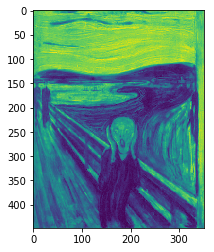

In [49]:
plt.imshow(tran[2])

**图像的存储**
`cv2.imwrite(img_path)`


# 读取保存视频文件
与上面的方法类似,只需要更改相机编号为相应的视频名称即可.读取成功后可以展示视频的所有帧,
读取视频后,单帧处理过后,先用保存成单张图片格式.

In [ ]:
cap = cv2.VideoCapture('vteset.avi')
while (cap.isOpended()):
    ret, frame = cap.read()
#     gray = cv2.cvtColor(frame)
    cv2.imshow()
    if cv2.waitKey

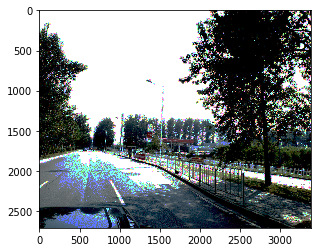

In [129]:
im = cv2.imread('ccf.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(im)
r,g,b = cv2.equalizeHist(r),cv2.equalizeHist(g),cv2.equalizeHist(b)
im_p = np.stack([r,g,b]).transpose(1,2,0)
plt.imshow(im_p)
im
skimage.io.imsave('ccf3.jpg', im_p)

In [ ]:
def backward(input):
    weight = 2 *input
    return weight 

In [58]:
import torch
ip = torch.tensor([[1,2.0], [3,4]], requires_grad=True)
weight = torch.tensor([[0.1,0.2],[0.3, 0.4]], requires_grad=True)
out = ip * weight
out = torch.relu(out)

out.sum().backward()
out.sum()
weight.grad

tensor([[ 1.,  2.],
        [ 3.,  4.]])

$$\tilde{Q_c}(x) =$$


In [ ]:
lr = 0.001
model
weight.grad
optimizer = nn.SGD(lr=..)

optimizer(model.parameter())
optimizer_weight = weight - lr * weight#SGD

#optimizer.step()

for i in range(epoch):
    out = model(input)
    loss = nn.MSE(out, target)
    optimizer.zero_grad()
    loss.sum().backward()
    optimizer.step()

# imgaug
不能读取PIL图像,只能处理ndarray格式的图像,创建一个`seq=iaa.Sequential([])`,之后`seq.augment_images(图像)`

In [120]:
data_dir = '/home/bobo/SSD_diak/Data/Baidu/train_label'
data_dir.split('/')[-1]

'train_label'

In [122]:
def get_label_name(image_name, offset=-4, postfix='_instanceIds.png'):
    label_name = image_name[:offset]
    label_name += postfix
    return label_name

def get_train_name(image_name, offset=-4, postfix='.jpg'):
    train_name = image_name[:-16]
    train_name += postfix
    return train_name

In [ ]:
def statics_class(image):
    instance_all = np.unique(image)
    

In [ ]:
from PIL import Image
from PIL import ImageEnhance
image_path = '/home/wdd/Tianchi/data/guangdong_round1_train2_20180916'
save_path = '/home/wdd/Tianchi/aug_data'
imgs = []
labels = []


def MultiCrop(img_path, size=1900):
    img = Image.open(img_path)
    trans = transform.Compose((transform.FiveCrop(size),))#使用transform的增强函数
    imgs = trans(img)
    for _, img in enumerate(imgs):
        save_name = os.path.splitext(img_path)[0]#此处注意名称分离,使用splitext分离首字母和下面的字母
        img.save(save_name+'_'+str(_)+'.jpg')
        print(save_name+'_'+str(_)+'.jpg')
    os.remove(img_path)#删除原来的数据

def ContrastEnhance(img_path, contrast=2, if_retain=False):
    save_name = os.path.splitext(img_path)[0]+'_CE'+str(contrast)+'.jpg'
    print('save: ', save_name)
    img = Image.open(img_path)
    pil_img = ImageEnhance.Contrast(img)
    img = pil_img.enhance(contrast)
    img.save(save_name)
    print('save: ', save_name)
    if not if_retain:
        os.remove(img_path)#

def RandomRotation(img_path, angles):
    import random
    angles = list(angles)
    angles_num = len(angles)
    index = random.random
    
class FixedRotation():
    def __init__(self, angles):
        self.angles = angles
    def __call__(self, img):
        return random_rotation(img, self.angles)
    def random_rotation(img, angles):
        import random
        angles = list(angles)
        angles_num = len(angles)
        index 
for first_path in os.listdir(image_path):
    first_path = os.path.join(image_path, first_path)
    if '无瑕疵样本' in first_path:
        for img in os.listdir(first_path):
            file_path = os.path.join(first_path, img)
#             MultiCrop(file_path)
            ContrastEnhance(file_path)
    else:
        for second_path in os.listdir(first_path):
            defect_label = second_path
            second_path = os.path.join(first_path, second_path)#一定要记得合并路径作为当前路径,读取图片全部使用绝对路径
            if defect_label != '其他':
                for img in os.listdir(second_path):
                    file_path = os.path.join(second_path, img)
                    MultiCrop(file_path)
            else:
                for third_path in os.listdir(second_path):
                    third_path = os.path.join(second_path, third_path)#
                    if os.path.isdir(third_path):
                        for img in os.listdir(third_path):
                            if 'DS_Store' not in img:
                                file_path = os.path.join(third_path, img)
#                                 MultiCrop(file_path)
                                ContrastEnhance(file_path)
#不要多次重复执行,这样会生成很多张图片的
                

In [147]:
statics = [0,0,0,0,0,0,0]
for i in result.keys():
    statics[i-1] += sta

In [52]:
test_image = 'ccf_label.png'
label_path = '/home/wdd/data/train_label'

info_all = {}
for test_image in os.listdir(label_path):
    test_name = osp.join(label_path, test_image)
    image = skimage.io.imread(test_name)
#     result = statistics_class(image)
    mask_out, freq, class_id = mask_to_instance(image)
#     mask_out = mask_out.transpose(2,0,1)
    print('class freq', freq)
    print('mask shape', mask_out.shape, 'class id shape', len(class_id))
    for mask in mask_out:
        area = cal_area_bbox(mask)
        print(test_image, area)
    info_all[test_image] = freq
for k, v in info_all.items():
    print(k,v, '\n')
# result = {33:0, 34:0, 35:0, 36:0, 38:0, 39:0, 40:0}
# class_id = statistics_class(test_image)
# for i in set(class_id):#使用集合去冗余
#     result[i] = class_id.count(i)
# print(result)

class freq {33: 50, 34: 0, 35: 1, 36: 4, 38: 0, 39: 0, 40: 0}
mask shape (52, 2710, 3384) class id shape 7
170927_064343082_Camera_5_instanceIds.png 140696
170927_064343082_Camera_5_instanceIds.png 151218
170927_064343082_Camera_5_instanceIds.png 47025
170927_064343082_Camera_5_instanceIds.png 30962
170927_064343082_Camera_5_instanceIds.png 6160
170927_064343082_Camera_5_instanceIds.png 16340
170927_064343082_Camera_5_instanceIds.png 12988
170927_064343082_Camera_5_instanceIds.png 16023
170927_064343082_Camera_5_instanceIds.png 10602
170927_064343082_Camera_5_instanceIds.png 8030
170927_064343082_Camera_5_instanceIds.png 3584
170927_064343082_Camera_5_instanceIds.png 4422
170927_064343082_Camera_5_instanceIds.png 1872
170927_064343082_Camera_5_instanceIds.png 1400
170927_064343082_Camera_5_instanceIds.png 1596
170927_064343082_Camera_5_instanceIds.png 2244
170927_064343082_Camera_5_instanceIds.png 1360
170927_064343082_Camera_5_instanceIds.png 703
170927_064343082_Camera_5_instanceIds.

class freq {33: 6, 34: 0, 35: 0, 36: 1, 38: 2, 39: 1, 40: 0}
mask shape (10, 2710, 3384) class id shape 7
170908_061955478_Camera_5_instanceIds.png 19328
170908_061955478_Camera_5_instanceIds.png 13192
170908_061955478_Camera_5_instanceIds.png 3680
170908_061955478_Camera_5_instanceIds.png 638
170908_061955478_Camera_5_instanceIds.png 936
170908_061955478_Camera_5_instanceIds.png 780
170908_061955478_Camera_5_instanceIds.png 2680
170908_061955478_Camera_5_instanceIds.png 48174
170908_061955478_Camera_5_instanceIds.png 21252
170908_061955478_Camera_5_instanceIds.png 810
170927_064343082_Camera_5_instanceIds.png {33: 50, 34: 0, 35: 1, 36: 4, 38: 0, 39: 0, 40: 0} 

170908_061502408_Camera_5_instanceIds.png {33: 4, 34: 0, 35: 0, 36: 0, 38: 0, 39: 1, 40: 1} 

170908_061955628_Camera_5_instanceIds.png {33: 10, 34: 0, 35: 0, 36: 1, 38: 2, 39: 1, 40: 0} 

170908_061502547_Camera_5_instanceIds.png {33: 4, 34: 0, 35: 0, 36: 0, 38: 0, 39: 1, 40: 1} 

170927_063838664_Camera_5_instanceIds.png {33:

In [31]:
test_image = 'ccf_label.png'
info_all = {}
image = skimage.io.imread(test_image)
result = statistics_class(image)
mask_out, clas_id = mask_to_instance(image)
mask_out = mask_out.transpose(2,0,1)
for mask in mask_out:
    area = cal_area_bbox(mask)
    print(area)
# result

6408
255
625
9009
336
357


In [25]:
a = np.array([1,0,0,1,1,1,1])
np.where(a)

(array([0, 3, 4, 5, 6]),)

## 测试心得体会

* 测试集尽量要包括全部情况,先用小样本,后用大样本,样本尽量要全部类别都进行抽样,如果样本情况不充分,会出现某些循环分支不执行,可能造成在本地测试无误,但是换到复杂场景下会出现异常,这是要考虑是不是某些模块(分支结构)会出现异常
* 在修改某个函数接口用法时,尤其是修改形参名称,一定要对全部所有的应用函数进行检查修改,以防出现bug
* 写文件养成固定顺序的好习惯,比如先写train的,再写label的,先读取,查找路径,再增强,再保存,养成可靠地代码流程

In [3]:
def statistics_class(label_image, label_map={33:1, 34:2, 35:3, 36:4, 38:5, 39:6, 40:7}):
    instances_all = np.unique(label_image)
    instances = []
    statistics_result = {33:0, 34:0, 35:0, 36:0, 38:0, 39:0, 40:0}
    for i in range(len(instances_all)):   
        instance = instances_all[i]
        instance_label = np.floor(instance/1000).astype(int)
        if instance_label in label_map.keys():
            statistics_result[instance_label] += 1
    return statistics_result

def mask_to_instance(label_image, label_map={33:1, 34:2, 35:3, 36:4, 38:5, 39:6, 40:7}, area_threshold = 300):
    instances_all = np.unique(label_image)
    instances = []
    for i in range(len(instances_all)):
        instance = instances_all[i]
        if np.floor(instance/1000).astype(int) in label_map.keys():
            instances.append(instance)
    instances = np.array(instances)
    num_instance = len(instances)#先筛选自己需要的目标
#     mask_out = np.zeros([label_image.shape[0], label_image.shape[1], num_instance], dtype=bool)
    class_ids = []
    mask_out = []
    for i in range(num_instance):
        instance = instances[i]
        class_ids.append(np.floor(instance/1000).astype(int))
        _mask = (label_image == instance)
        mask_area = cal_area_bbox(_mask)
        if mask_area > area_threshold:
            mask_out.append(_mask)
    mask_out = np.array(mask_out)
        # TODO:
#         mask_out[:, :, i] = (label_image == instance)
#     print(type(class_ids))
    freq = {33:0, 34:0, 35:0, 36:0, 38:0, 39:0, 40:0}
    for i in set(class_ids):#使用集合去冗余
        freq[i] = class_ids.count(i)#命名错误会出现问题,cell前后记忆!!!
    return mask_out, freq, class_ids#返回mask和次数

def cal_area_bbox(mask):
    horizon_indices = np.where(np.any(mask, axis=0))[0]
    vertical_indices = np.where(np.any(mask, axis=1))[0]
    if horizon_indices.shape[0] :
        x1, x2 = horizon_indices[[0, -1]]
        y1, y2 = vertical_indices[[0, -1]]
        area = (x2 - x1 + 1) * (y2 - y1 + 1)
        return area
    else:
        return 0

def get_train_name(image_name):
    train_name = image_name[:-16]
    train_name += '.jpg'
    return train_name

def get_label_name(image_name, offset=-5, postfix='_instanceIds.png'):
    label_name = image_name[:offset]
    label_name += postfix
    return label_name

def image_augmentation(image_path,mode = 'skimage', aug=None):
    if mode == 'skimage':
        image = skimage.io.imread(image_path)
    elif mode == 'cv2':
        image = cv2.imread(image_path)
    elif mode == 'pil':
        from PIL import Image
        image = Image.open(image_path)
    else:
        raise Exception('Unknown reading mode!')#Exception后面加文字!
    assert isinstance(aug, iaa.Sequential)
    if aug is None:
        return image
#     aug = aug_seq.to_deterministic()
    return aug.augment_image(image)


def make_dir(path):
    if not osp.exists(path):
        os.makedirs(path)
        return 1
    return 0


In [ ]:
test_path = '/home/wdd/Tianchi/data/guangdong_round1_train2_20180916/瑕疵样本/漏底/漏底20180829172401对照样本.jpg'
if os.path.isdir(test_path):
    print(True)
img = Image.open(test_path)
trans = transform.Compose((transform.TenCrop((500,500)),))#错误提示__init__(),在该行的话,说明里面有个函数没加参数
# img = trans(np.array(img))
img = trans(img)
# print(img.size())
save_path = 'pil_save/'
path = 'pil/'
for _, i in enumerate(img):
    if not os.path.exists(save_path+path):#一定要十分注意路径,要加前置路径,
#         print(save_path+path)
        os.mkdir(save_path+path)
    i.save(save_path+path+str(_)+'.jpg')#不加前置路径默认存储到当前文件夹下
# img.show()
# img.show()
# hsv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2HSV)
# hsv_img = Image.fromarray(hsv)
# length, height, width = img.shape
region = (height/4, width/4, height*3/4, width*3/4)
cropimg = img.crop(region)

img_sharped = ImageEnhance.Color(img)
img_sharped = img_sharped.enhance(2)
# img_sharped.show()
# cropimg.show()#(left, upper, right, lower)
# img.show()

In [5]:
from torch.utils.data import Dataset, DataLoader

In [21]:
a = 'sss\n'
print(a.strip('\n'))
print(a)

sss
sss



In [15]:
from torch.utils.data import Dataset, DataLoader
class TrainDataset(Dataset):
    def __init__(self, train_list, transform=None, loader_mode = 'skimage'):
        self.data = train_list
        self.img = []
        self.transform = transform
        with open(train_list, 'r+') as file:
            for path in file.readlines():
                path  = path.strip('\n')#此处要赋值
                self.img.append(path)
        self.loader_mode = loader_mode
    def __getitem__(self, x):
        image_name = self.img[x]
        if self.transform:
            return image_augmentation(image_name, mode=self.loader_mode, aug= self.transform)
        else:
            return skimage.io.imread(image_name)
    def __len__(self):
        return len(self.img)
    def image_augmentation(self, image_path,mode = 'skimage', aug=None):
        if mode == 'skimage':
            image = skimage.io.imread(image_path)
        elif mode == 'cv2':
            image = cv2.imread(image_path)
        elif mode == 'pil':
            from PIL import Image
            image = Image.open(image_path)
        else:
            raise Exception('Unknown reading mode!')#Exception后面加文字!
        assert isinstance(aug, iaa.Sequential)
        if aug is None:
            return image
    #     aug = aug_seq.to_deterministic()
        return aug.augment_image(image)

In [ ]:
data_dir = '/home/wdd/data'
train_dir ='/media/wdd/办公/train_color'
label_to_class = {38:1, 40:7, 39:6}
class_to_label = {1:33, 2:34, 3:35, 4:36, 5:38, 6:39, 7:40}
class_to_name = {38:'truck', 40:'tricycle', 39:'bus'}
save_label_file = '/home/wdd/save_train'
save_train_file = '/home/wdd/save_label'
train_file_path = '/home/wdd/data/train_color'
y = lambda path : make_dir(path)
[y(i) for i in [save_label_file, save_train_file]]
# mkdir(save_label_file)
# mkdir(save_train_file)
info_all = {}

#--------------------------------------------
sometimes = lambda aug: iaa.Sometimes(0.3, aug)

In [48]:
seq = iaa.Sequential([
    iaa.OneOf([
        iaa.Fliplr(0.5),
#         iaa.Flipud(0.5),
#         iaa.PerspectiveTransform(scale=0.125)
#         iaa.Affine(rotate=(90))
    ]),
    iaa.OneOf([
        iaa.GaussianBlur(sigma=1.2),#1.2
        iaa.AverageBlur(k=5),#7
        iaa.MedianBlur(k=5)#7
    ]),
    iaa.OneOf([
        iaa.Sharpen(lightness=1.2),#1.1
        iaa.ContrastNormalization((1.1, 1.2)),#1.1,1.2
        iaa.AddToHueAndSaturation((-5,5))#-5,5
    ])
])
seq_det = seq.to_deterministic(len(class_to_label.keys())+1)

In [46]:
train_dataset = TrainDataset('38.csv',transform=seq_det[5])
# plt.imshow(train_dataset[100])
train_dataloader = DataLoader(train_dataset,batch_size=8, num_workers=8,shuffle=False )
counter = 0
dir_path = '/home/wdd/save_aug/38'
for image in train_dataloader:
    for i in image:
        name = str(counter) + '.jpg'
        save_path = osp.join(dir_path, name)
        print(save_path)
        skimage.io.imsave(save_path, i)
        counter += 1

FileNotFoundError: Traceback (most recent call last):
  File "/home/wdd/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/wdd/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "<ipython-input-15-b0aee516d5e3>", line 15, in __getitem__
    return image_augmentation(image_name, mode=self.loader_mode, aug= self.transform)
  File "<ipython-input-43-ff3fdc345088>", line 63, in image_augmentation
    image = skimage.io.imread(image_path)
  File "/home/wdd/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py", line 62, in imread
    img = call_plugin('imread', fname, plugin=plugin, **plugin_args)
  File "/home/wdd/anaconda3/lib/python3.6/site-packages/skimage/io/manage_plugins.py", line 214, in call_plugin
    return func(*args, **kwargs)
  File "/home/wdd/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/pil_plugin.py", line 35, in imread
    with open(fname, 'rb') as f:
FileNotFoundError: [Errno 2] No such file or directory: '171206_034418515_Camera_5.jpg'


Process Process-62:
Process Process-63:
Process Process-57:
Process Process-60:
Process Process-64:
Process Process-61:
Process Process-58:
Process Process-59:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/wdd/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/wdd/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/wdd/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/wdd/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/wdd/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/h

In [49]:
label_to_class = {33:1,34:2,35:3, 36:4, 38:5, 39:6, 40:7}
class_to_label = {1:33, 2:34, 3:35, 4:36, 5:38, 6:39, 7:40}
class_to_name = {38:'truck', 40:'tricycle', 39:'bus' }
label_dir = '/media/wdd/办公/train_label'
save_path = '/home/wdd/save_aug/'
train_dir ='/media/wdd/办公/train_color'
for _class in ['34', '35', '38', '39', '40']:
    image_list = open(_class+'.csv', 'r+')
    _class_dir = osp.join(save_path, _class)
    save_train_path = osp.join(_class_dir, 'image/')
    save_label_path = osp.join(_class_dir, 'label/')
    make_dir(save_train_path)
    make_dir(save_label_path)
    for img_name in image_list.readlines():
        label_name = get_label_name(img_name)
        label_path = osp.join(label_dir, label_name)
        save_label_image = osp.join(save_label_path , label_name)
        print('Label:save %s to %s '%(label_path, save_label_path))
        shutil.copy(label_path, save_label_path)
        train_image = osp.join(train_dir, img_name.strip('\n'))#命名时不要取覆盖路径@!!!!!!!!!
        image = image_augmentation(train_image,aug=seq_det[label_to_class[int(_class)]])
        save_train_image = osp.join(save_train_path, img_name.strip('\n'))
        print('Image:save %s  '%(save_train_image))
        skimage.io.imsave(save_train_image, image)
    image_list.close()

Label:save /media/wdd/办公/train_label/171206_033616599_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_033616599_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033413246_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_033413246_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_034403506_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_034403506_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_025800504_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_025800504_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070244757_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170927_070244757_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_030431246_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_033654606_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_033654606_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_034400406_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_034400406_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_073116245_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170908_073116245_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_082036925_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170908_082036925_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_032344443_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_032344443_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_032602161_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_034503789_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_034503789_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_034500787_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_034500787_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033626810_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_033626810_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_075028704_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170908_075028704_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070242477_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170927_070242477_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_032300332_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_032641785_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_032641785_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_034357232_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_034357232_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_032157227_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_032157227_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_073220296_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170908_073220296_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_073211970_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170908_073211970_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033345575_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_032354271_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_032354271_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064205355_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170927_064205355_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065517475_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170908_065517475_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_032641620_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_032641620_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_063839510_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170927_063839510_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_030231738_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_030427186_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_030427186_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_034455258_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_034455258_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033704080_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_033704080_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_062201371_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170908_062201371_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070453839_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170927_070453839_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_073153681_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_082037949_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170908_082037949_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033334584_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_033334584_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_032343354_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_032343354_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_062110194_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170908_062110194_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033325238_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_033325238_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_030420125_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170927_064151462_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170927_064151462_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_030449077_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_030449077_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_032337006_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_032337006_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_075048064_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170908_075048064_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_064522156_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170927_064522156_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_032721922_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_033705190_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_033705190_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070241109_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170927_070241109_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_025801209_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_025801209_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_034433912_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_034433912_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_032322004_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_032322004_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033622532_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_033238099_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_033238099_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_030225846_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_030225846_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033651918_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_033651918_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_034407140_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_034407140_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_034508351_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_034508351_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_034425470_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_032624120_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_032624120_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_030436366_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_030436366_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_033611079_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_033611079_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064207091_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170927_064207091_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_030334300_Camera_5_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_030334300_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_065604574_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_030506349_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_030506349_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_032643434_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_032643434_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_030335236_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_030335236_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_062110482_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/170908_062110482_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033621014_Camera_6_instanceIds.png to /home/wdd/save_aug/34/label/ 
Image:save /home/wdd/save_aug/34/image/171206_033621014_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033243559_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_032217804_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_032217804_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070248405_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070248405_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_070226194_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070226194_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065531635_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_065531635_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070447668_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070447668_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033211010_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_033424212_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_033424212_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_034424090_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_034424090_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_062115666_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_062115666_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_030339076_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_030339076_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_075252274_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_075252274_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_062227846_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_025913504_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_025913504_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_072728325_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_072728325_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_063941238_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_063941238_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_063956330_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_063956330_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064516026_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_064516026_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064247141_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170927_064034923_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_064034923_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_032618090_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_032618090_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070201089_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070201089_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_030430396_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_030430396_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070142742_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070142742_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_030331492_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_061541188_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_061541188_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_034312834_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_034312834_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_070317401_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070317401_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_034226907_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_034226907_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_030330660_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_030330660_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_070154381_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_025856400_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_025856400_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_070328386_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070328386_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070405031_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070405031_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_033205549_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_033205549_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070257373_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070257373_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070333041_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170927_070333174_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070333174_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_064007424_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_064007424_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064242801_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_064242801_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_065611853_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_065611853_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065542865_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_065542865_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_073223926_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170927_070357466_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070357466_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064350561_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_064350561_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_064008457_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_064008457_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_064219998_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_064219998_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_075250799_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_075250799_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_032356934_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_062132163_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_062132163_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070235978_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070235978_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061535350_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_061535350_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_073153464_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_073153464_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_085355142_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_085355142_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_034507581_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_030514900_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_030514900_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_082032830_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_082032830_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_072719955_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_072719955_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070427879_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070427879_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_034355024_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_034355024_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_081950875_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_065614583_Camera_6_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170908_065614583_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070311311_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070311311_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_070225564_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070225564_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_034354334_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/171206_034354334_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_070243389_Camera_5_instanceIds.png to /home/wdd/save_aug/35/label/ 
Image:save /home/wdd/save_aug/35/image/170927_070243389_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_070145906_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_074921392_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_074921392_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_072648906_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_072648906_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_072839197_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_072839197_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_064039670_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170927_064039670_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_025744004_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_025744004_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_033300672_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_032650032_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_032650032_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_075030904_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_075030904_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_033928955_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_033928955_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_063847439_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170927_063847439_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_033302312_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_033302312_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064036299_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_062105155_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_062105155_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_065107051_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_065107051_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_030032854_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_030032854_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_073259001_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_073259001_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_030215000_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_030215000_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_072801263_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170927_064420953_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170927_064420953_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_030140253_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_030140253_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_072812198_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_072812198_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_030429546_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_030429546_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033102731_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_033102731_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_032939996_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170927_070258133_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170927_070258133_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033315572_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_033315572_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_032736578_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_032736578_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_074910888_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_074910888_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_072857556_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_072857556_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070225879_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_033217718_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_033217718_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_032727467_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_032727467_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_082209594_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_082209594_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_033317671_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_033317671_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033236422_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_033236422_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070243997_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_062050892_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_062050892_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_065603664_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_065603664_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_072908626_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_072908626_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_073215204_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_073215204_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_062123042_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_062123042_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064031774_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_033701856_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_033701856_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_030212102_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_030212102_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_030339696_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_030339696_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_075023815_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_075023815_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064406065_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170927_064406065_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_032325312_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170927_063843740_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170927_063843740_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_070431996_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170927_070431996_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_064452657_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170927_064452657_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064038431_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170927_064038431_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_070257677_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170927_070257677_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033659971_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_072801938_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_072801938_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_073149341_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_073149341_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_062120418_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_062120418_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_074950679_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_074950679_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064005747_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170927_064005747_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064505940_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_073303154_Camera_5_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_073303154_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_072723330_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_072723330_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_033707410_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/171206_033707410_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_075023326_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_075023326_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_073302484_Camera_6_instanceIds.png to /home/wdd/save_aug/38/label/ 
Image:save /home/wdd/save_aug/38/image/170908_073302484_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_082343994_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_065206261_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065206261_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_065040172_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065040172_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_082223929_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082223929_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_065152941_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065152941_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_030339448_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/171206_030339448_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_082330103_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_065651762_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065651762_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_082247481_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082247481_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064248753_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170927_064248753_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_082358226_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082358226_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_082327671_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082327671_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_063950654_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_065058603_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065058603_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065652022_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065652022_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_085333143_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_085333143_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_065223356_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065223356_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_082318711_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082318711_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065702552_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170927_070148166_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170927_070148166_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065007597_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065007597_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_064206347_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170927_064206347_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_082012038_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082012038_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061739024_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_061739024_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065041836_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_082325751_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082325751_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061632305_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_061632305_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061630238_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_061630238_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065033772_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065033772_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_064045434_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170927_064045434_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_063941884_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_061536740_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_061536740_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065229244_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065229244_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061514362_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_061514362_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_033756664_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/171206_033756664_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070506503_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170927_070506503_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_075255964_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_065055403_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065055403_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_082155003_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082155003_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_082254392_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082254392_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_065114603_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065114603_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061647457_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_061647457_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070404657_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_065229756_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065229756_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_075248093_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_075248093_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064211059_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170927_064211059_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065115627_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065115627_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065048620_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065048620_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_082315127_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170927_063935309_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170927_063935309_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_085349267_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_085349267_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_070418031_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170927_070418031_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_075250676_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_075250676_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_081947175_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_081947175_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170927_070448436_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_065121130_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065121130_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_082330103_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082330103_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_082402578_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082402578_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_082300792_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082300792_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_082404242_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082404242_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061502547_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170927_070318412_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170927_070318412_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_082300664_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_082300664_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_075254119_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_075254119_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065128042_Camera_5_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_065128042_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061727210_Camera_6_instanceIds.png to /home/wdd/save_aug/39/label/ 
Image:save /home/wdd/save_aug/39/image/170908_061727210_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_065551444_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_030115410_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/171206_030115410_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061618855_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061618855_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061703442_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061703442_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_073255517_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_073255517_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_032209985_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/171206_032209985_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061705944_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_061629920_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061629920_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061711920_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061711920_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_085257019_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085257019_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061649681_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061649681_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061520061_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061520061_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_085256269_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_085307769_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085307769_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_082043325_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_082043325_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061659689_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061659689_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_073319636_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_073319636_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061549666_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061549666_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_085252519_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_085256519_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085256519_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_034457785_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/171206_034457785_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061554392_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061554392_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061702747_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061702747_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_085251519_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085251519_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_085258019_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_082029206_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_082029206_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_075412764_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_075412764_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_085324268_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085324268_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_025903380_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/171206_025903380_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_073308916_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_073308916_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_085443715_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_061622330_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061622330_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_085254019_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085254019_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061531319_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061531319_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_025858960_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/171206_025858960_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_085259394_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085259394_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_032205305_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/171206_032614970_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/171206_032614970_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_034502051_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/171206_034502051_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_085250019_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085250019_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170927_064408377_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170927_064408377_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061617187_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061617187_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_085249769_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_061636199_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061636199_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_085242769_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085242769_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_085249519_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085249519_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_085442845_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085442845_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061635921_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061635921_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061607041_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_061527566_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061527566_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_085320143_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085320143_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061554531_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061554531_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_034502999_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/171206_034502999_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061646762_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061646762_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061607736_Camera_5_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_085247644_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085247644_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_025903380_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/171206_025903380_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061626899_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061626899_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_075421344_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_075421344_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061624991_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061624991_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_025900005_Camera_6_instanceIds.png to /ho

Label:save /media/wdd/办公/train_label/170908_085248769_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_085248769_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/170908_061651905_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061651905_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_061621357_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_061621357_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/170908_082026246_Camera_6_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/170908_082026246_Camera_6.jpg  
Label:save /media/wdd/办公/train_label/171206_032617960_Camera_5_instanceIds.png to /home/wdd/save_aug/40/label/ 
Image:save /home/wdd/save_aug/40/image/171206_032617960_Camera_5.jpg  
Label:save /media/wdd/办公/train_label/171206_032616920_Camera_5_instanceIds.png to /ho

In [4]:
def copy_file(image_list, image_dir, out_dir):
    make_dir(image_dir)
    for img in image_list:
        src_path = osp.join(image_dir, img)
        print('copy %s to %s'%(src_path, out_dir))
        shutil.copy(src_path, out_dir)

In [6]:
label_to_class = {33:1,34:2,35:3, 36:4, 38:5, 39:6, 40:7}
class_to_label = {1:33, 2:34, 3:35, 4:36, 5:38, 6:39, 7:40}
class_to_name = {38:'truck', 40:'tricycle', 39:'bus' }
label_dir = '/media/wdd/办公/train_label'
save_path = '/home/wdd/save_aug/'
train_dir ='/media/wdd/办公/train_color'
for _class in ['34', '35', '38', '39', '40']:
    dir_path = osp.join(save_path, _class)
    dir_path_train = osp.join(dir_path, 'image')
    dir_path_label = osp.join(dir_path, 'label')
    dir_path_train_list = os.listdir(dir_path_train)
    dir_path_label_list = os.listdir(dir_path_label)
    out_dir_path_train_img = osp.join(dir_path+'/train', 'image')
    out_dir_path_train_label = osp.join(dir_path+'/train', 'label')
    out_dir_path_val_img = osp.join(dir_path+'/val', 'image')
    out_dir_path_val_label = osp.join(dir_path+'/val', 'label')
    make_dir(out_dir_path_train_img)
    make_dir(out_dir_path_train_label)
    make_dir(out_dir_path_val_img)
    make_dir(out_dir_path_val_label)
#     train_imgs_dir = osp.join(dir_path_train.)
    train_imgs, val_imgs, train_labels, val_labels= \
        train_test_split(dir_path_train_list, dir_path_label_list, test_size=0.1)
    copy_file(train_imgs, dir_path_train, out_dir_path_train_img)
    copy_file(val_imgs, dir_path_train, out_dir_path_val_img)
    copy_file(train_labels, dir_path_label, out_dir_path_train_label)
    copy_file(val_labels, dir_path_label, out_dir_path_val_label)
#     print(dir_path_train_list)
    
    

copy /home/wdd/save_aug/34/image/170927_064221638_Camera_5.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/171206_034454744_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/170908_073257125_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/171206_032153109_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/170927_064209571_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/170908_074953927_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/171206_025801209_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/170927_064205355_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/171206_032353383_Camera_5.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/171206_030506637_Camera_5.jpg to /home/wdd/save_aug/34/train/image


copy /home/wdd/save_aug/34/image/171206_025754948_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/170927_070444127_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/171206_025753339_Camera_5.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/171206_033245241_Camera_5.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/171206_030455637_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/171206_033228941_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/170927_064239949_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/170908_062110194_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/170908_062101987_Camera_6.jpg to /home/wdd/save_aug/34/train/image
copy /home/wdd/save_aug/34/image/170908_074957198_Camera_6.jpg to /home/wdd/save_aug/34/train/image


copy /home/wdd/save_aug/35/image/170927_064054342_Camera_6.jpg to /home/wdd/save_aug/35/train/image
copy /home/wdd/save_aug/35/image/170927_070450368_Camera_6.jpg to /home/wdd/save_aug/35/train/image
copy /home/wdd/save_aug/35/image/170908_073236221_Camera_6.jpg to /home/wdd/save_aug/35/train/image
copy /home/wdd/save_aug/35/image/171206_034425056_Camera_5.jpg to /home/wdd/save_aug/35/train/image
copy /home/wdd/save_aug/35/image/170908_082307448_Camera_6.jpg to /home/wdd/save_aug/35/train/image
copy /home/wdd/save_aug/35/image/171206_032618090_Camera_6.jpg to /home/wdd/save_aug/35/train/image
copy /home/wdd/save_aug/35/image/170927_064518895_Camera_6.jpg to /home/wdd/save_aug/35/train/image
copy /home/wdd/save_aug/35/image/171206_033739795_Camera_6.jpg to /home/wdd/save_aug/35/train/image
copy /home/wdd/save_aug/35/image/170908_061535350_Camera_6.jpg to /home/wdd/save_aug/35/train/image
copy /home/wdd/save_aug/35/image/170927_070450712_Camera_5.jpg to /home/wdd/save_aug/35/train/image


copy /home/wdd/save_aug/35/label/170927_064356681_Camera_6_instanceIds.png to /home/wdd/save_aug/35/train/label
copy /home/wdd/save_aug/35/label/171206_034508489_Camera_6_instanceIds.png to /home/wdd/save_aug/35/train/label
copy /home/wdd/save_aug/35/label/170908_065624853_Camera_6_instanceIds.png to /home/wdd/save_aug/35/train/label
copy /home/wdd/save_aug/35/label/170927_063950397_Camera_6_instanceIds.png to /home/wdd/save_aug/35/train/label
copy /home/wdd/save_aug/35/label/171206_033205549_Camera_6_instanceIds.png to /home/wdd/save_aug/35/train/label
copy /home/wdd/save_aug/35/label/170908_073201037_Camera_6_instanceIds.png to /home/wdd/save_aug/35/train/label
copy /home/wdd/save_aug/35/label/171206_033809498_Camera_6_instanceIds.png to /home/wdd/save_aug/35/train/label
copy /home/wdd/save_aug/35/label/170927_064516026_Camera_5_instanceIds.png to /home/wdd/save_aug/35/train/label
copy /home/wdd/save_aug/35/label/170927_070248405_Camera_5_instanceIds.png to /home/wdd/save_aug/35/trai

copy /home/wdd/save_aug/38/image/170908_074917588_Camera_6.jpg to /home/wdd/save_aug/38/train/image
copy /home/wdd/save_aug/38/image/171206_033318911_Camera_6.jpg to /home/wdd/save_aug/38/train/image
copy /home/wdd/save_aug/38/image/170908_072833122_Camera_5.jpg to /home/wdd/save_aug/38/train/image
copy /home/wdd/save_aug/38/image/170927_064236801_Camera_5.jpg to /home/wdd/save_aug/38/train/image
copy /home/wdd/save_aug/38/image/171206_030034624_Camera_6.jpg to /home/wdd/save_aug/38/train/image
copy /home/wdd/save_aug/38/image/170908_074912496_Camera_6.jpg to /home/wdd/save_aug/38/train/image
copy /home/wdd/save_aug/38/image/170927_064246149_Camera_6.jpg to /home/wdd/save_aug/38/train/image
copy /home/wdd/save_aug/38/image/171206_032641250_Camera_5.jpg to /home/wdd/save_aug/38/train/image
copy /home/wdd/save_aug/38/image/171206_032654451_Camera_6.jpg to /home/wdd/save_aug/38/train/image
copy /home/wdd/save_aug/38/image/171206_030144140_Camera_5.jpg to /home/wdd/save_aug/38/train/image


copy /home/wdd/save_aug/38/image/171206_033255962_Camera_5.jpg to /home/wdd/save_aug/38/val/image
copy /home/wdd/save_aug/38/image/170908_073157943_Camera_5.jpg to /home/wdd/save_aug/38/val/image
copy /home/wdd/save_aug/38/image/171206_032651282_Camera_6.jpg to /home/wdd/save_aug/38/val/image
copy /home/wdd/save_aug/38/image/170927_064510860_Camera_5.jpg to /home/wdd/save_aug/38/val/image
copy /home/wdd/save_aug/38/image/171206_033312632_Camera_5.jpg to /home/wdd/save_aug/38/val/image
copy /home/wdd/save_aug/38/image/171206_030339696_Camera_5.jpg to /home/wdd/save_aug/38/val/image
copy /home/wdd/save_aug/38/image/171206_033217331_Camera_6.jpg to /home/wdd/save_aug/38/val/image
copy /home/wdd/save_aug/38/image/171206_032738576_Camera_6.jpg to /home/wdd/save_aug/38/val/image
copy /home/wdd/save_aug/38/image/171206_033052508_Camera_6.jpg to /home/wdd/save_aug/38/val/image
copy /home/wdd/save_aug/38/image/170927_070432631_Camera_5.jpg to /home/wdd/save_aug/38/val/image
copy /home/wdd/save_

copy /home/wdd/save_aug/39/image/170927_070149070_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_065645912_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_082330103_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_082330871_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_082012038_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_082247481_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170927_063944721_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_082225209_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_065651762_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/171206_033746039_Camera_6.jpg to /home/wdd/save_aug/39/train/image


copy /home/wdd/save_aug/39/image/170927_064045565_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_082356690_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_065513446_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_065228604_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_065051564_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_082204730_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170927_070148166_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_082352978_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_065108971_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_061630238_Camera_6.jpg to /home/wdd/save_aug/39/train/image


copy /home/wdd/save_aug/39/image/170908_085338267_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_065528485_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/171206_033803288_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170927_064248753_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_065051436_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170927_064100629_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_061514362_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_082325495_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_065601974_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_065009225_Camera_6.jpg to /home/wdd/save_aug/39/train/image


copy /home/wdd/save_aug/39/image/170908_061647457_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/171206_033213461_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_065217468_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_073235551_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170927_070456727_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170927_064210687_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170927_064215522_Camera_6.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170908_065048620_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/170927_064202043_Camera_5.jpg to /home/wdd/save_aug/39/train/image
copy /home/wdd/save_aug/39/image/171206_033801770_Camera_5.jpg to /home/wdd/save_aug/39/train/image


copy /home/wdd/save_aug/39/image/170908_065636163_Camera_6.jpg to /home/wdd/save_aug/39/val/image
copy /home/wdd/save_aug/39/label/170908_085326768_Camera_5_instanceIds.png to /home/wdd/save_aug/39/train/label
copy /home/wdd/save_aug/39/label/170927_070157997_Camera_5_instanceIds.png to /home/wdd/save_aug/39/train/label
copy /home/wdd/save_aug/39/label/170927_063945754_Camera_6_instanceIds.png to /home/wdd/save_aug/39/train/label
copy /home/wdd/save_aug/39/label/170908_075303555_Camera_5_instanceIds.png to /home/wdd/save_aug/39/train/label
copy /home/wdd/save_aug/39/label/170908_075251045_Camera_5_instanceIds.png to /home/wdd/save_aug/39/train/label
copy /home/wdd/save_aug/39/label/170908_082320247_Camera_6_instanceIds.png to /home/wdd/save_aug/39/train/label
copy /home/wdd/save_aug/39/label/170908_061627376_Camera_6_instanceIds.png to /home/wdd/save_aug/39/train/label
copy /home/wdd/save_aug/39/label/170908_061734855_Camera_6_instanceIds.png to /home/wdd/save_aug/39/train/label
copy /

copy /home/wdd/save_aug/40/image/170908_085252644_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_082034366_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/171206_032209985_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_075418913_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_085234145_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_082034238_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_082022546_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_085250644_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_061558423_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_062232422_Camera_6.jpg to /home/wdd/save_aug/40/train/image


copy /home/wdd/save_aug/40/image/170908_061705527_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_085235395_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_072714690_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_085233770_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/171206_025903515_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/171206_033126082_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_085301519_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_082022694_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_082031294_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_061657326_Camera_5.jpg to /home/wdd/save_aug/40/train/image


copy /home/wdd/save_aug/40/image/170908_073319636_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/171206_034456680_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_085238770_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_061647596_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_065143274_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/171206_032245303_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_075416339_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_075412764_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_061619550_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_061608014_Camera_5.jpg to /home/wdd/save_aug/40/train/image


copy /home/wdd/save_aug/40/image/170908_061543551_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_061703442_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_073307978_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_085308144_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_061512416_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/171206_025903650_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/171206_033127198_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_075247601_Camera_5.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_075422345_Camera_6.jpg to /home/wdd/save_aug/40/train/image
copy /home/wdd/save_aug/40/image/170908_061517003_Camera_6.jpg to /home/wdd/save_aug/40/train/image


In [28]:

os.makedirs('save_aug/34/image/')

In [ ]:
train_dir ='/media/wdd/办公/train_color'

In [60]:
save_label_file = '/home/wdd/save_train/test'
save_train_file = '/home/wdd/save_label'
y = lambda path : make_dir(path)
[y(i) for i in [save_label_file, save_train_file]]

[0, 0]

In [186]:
summary_file = open('baidu_summary.csv', 'a+')
a =[1,2,3,4,5]
summary_file.writelines([str(i)+',' for i in a])

In [174]:
summary_file.write('ImageId,33,34,35,36,38,39,40\n')
# summary_file.write('ImageId,33,34,35,36,38,39,40\n')

29

In [110]:
l = [1,2,3,4,5,6]
name = 'wdd'
with open('summary.csv', 'w+') as file:
    file.write(name, l)

TypeError: write() takes exactly one argument (2 given)

In [109]:
data_dir = '/home/wdd/data'
label_to_class = {38:1, 40:7, 39:6}
class_to_label = {1:33, 2:34, 3:35, 4:36, 5:38, 6:39, 7:40}
class_to_name = {38:'truck', 40:'tricycle', 39:'bus'}
save_label_file = '/home/wdd/save_train'
save_train_file = '/home/wdd/save_label'
train_file_path = '/home/wdd/data/train_color'
y = lambda path : make_dir(path)
[y(i) for i in [save_label_file, save_train_file]]
# mkdir(save_label_file)
# mkdir(save_train_file)
info_all = {}
summary_file = open('baidu_summary.csv', 'w+')
summary_file.write('ImageId,33,34,35,36,38,39,40\n')
#--------------------------------------------
sometimes = lambda aug: iaa.Sometimes(0.3, aug)
seq = iaa.Sequential([
    iaa.OneOf([
        iaa.Fliplr(0.5),
#         iaa.Flipud(0.5),
#         iaa.PerspectiveTransform(scale=0.125)
#         iaa.Affine(rotate=(90))
    ]),
    iaa.OneOf([
        iaa.GaussianBlur(sigma=1.2),#1.2
        iaa.AverageBlur(k=5),#7
        iaa.MedianBlur(k=5)#7
    ]),
    iaa.OneOf([
        iaa.Sharpen(lightness=1.2),#1.1
        iaa.ContrastNormalization((1.1, 1.2)),#1.1,1.2
        iaa.AddToHueAndSaturation((-5,5))#-5,5
    ])
])
seq_det = seq.to_deterministic(len(class_to_label.keys())+1)#这个是决定里面的不定项,如果一旦确定下来,seq_det其实是一个固定的变换
#-------------------------------------------
for root, dirs, files in os.walk(data_dir):
    if root.split('/')[-1] == 'train_label':
        for label_name in files:
            train_name = get_train_name(label_name)#提前获取train_name
            label_path = osp.join(root, label_name)
            label_image = skimage.io.imread(label_path)
            freq = statistics_class(label_image)
#             mask, class_id = mask_to_instance(label)#输出mask
            info_all[train_name] = freq
            image_int = np.floor(label_image/1000).astype(int)
            class_labels = np.unique(image_int)
            intersection_class = list(set(class_labels) & set(label_to_class.keys()))
            if len(intersection_class) > 1:#现在读train图像
                train_path = osp.join(train_file_path, train_name)####
                for i, sub_class in enumerate(intersection_class):
                    save_train_byClass = osp.join(save_train_file, class_to_name[sub_class])
                    save_label_byClass = osp.join(save_label_file, class_to_name[sub_class])
                    save_train_path = osp.join(save_train_byClass, train_name)
                    make_dir(save_label_byClass)
                    make_dir(save_train_byClass)
                    #------------augmentation -------------------------
                    aug_image = image_augmentation(train_path, aug=seq_det[label_to_class[sub_class]])#在后面
                    #------------save image to corresponding dir----
                    skimage.io.imsave(save_train_path, aug_image)#save train 
                    if not os.system('cp %s %s' % (label_path, save_label_byClass)):#mode label to path
                        print('Succsussfully Copy %s to %s '%(label_path, save_label_byClass))#move label
            elif len(intersection_class) == 1:
                train_path = osp.join(train_file_path, train_name)####
                save_label_byClass = osp.join(save_label_file, class_to_name[intersection_class[0]])
                save_train_byClass = osp.join(save_train_file, class_to_name[intersection_class[0]])
                save_train_path = osp.join(save_train_byClass, train_name)
                make_dir(save_label_byClass)
                make_dir(save_train_byClass)
                #------------augmentation--------------------------
                aug_image = image_augmentation(train_path, aug=seq_det[label_to_class[sub_class]])    
                #------------save image to corresponding dir-----
                skimage.io.imsave(save_train_path, aug_image)
#                 save_label_path = osp.join(save_label_byClass, label_name)
                if not os.system('cp %s %s' % (label_path, save_label_byClass)):
                    print('Succsussfully Copy %s to %s '%(label_path, save_label_byClass))
            with open('summary.csv', 'w+') as file:
                file.write()
            else:
                continue
    

Succsussfully Copy /home/wdd/data/train_label/170908_061502408_Camera_5_instanceIds.png to /home/wdd/save_label/tricycle 
Succsussfully Copy /home/wdd/data/train_label/170908_061502408_Camera_5_instanceIds.png to /home/wdd/save_label/bus 
Succsussfully Copy /home/wdd/data/train_label/170908_061955628_Camera_5_instanceIds.png to /home/wdd/save_label/truck 
Succsussfully Copy /home/wdd/data/train_label/170908_061955628_Camera_5_instanceIds.png to /home/wdd/save_label/bus 
Succsussfully Copy /home/wdd/data/train_label/170908_061502547_Camera_5_instanceIds.png to /home/wdd/save_label/tricycle 
Succsussfully Copy /home/wdd/data/train_label/170908_061502547_Camera_5_instanceIds.png to /home/wdd/save_label/bus 
Succsussfully Copy /home/wdd/data/train_label/170927_063838664_Camera_5_instanceIds.png to /home/wdd/save_label/tricycle 
Succsussfully Copy /home/wdd/data/train_label/170927_063838664_Camera_5_instanceIds.png to /home/wdd/save_label/truck 
Succsussfully Copy /home/wdd/data/train_label

In [95]:
import pandas as pd
label_map={33:1, 34:2, 35:3, 36:4, 38:5, 39:6, 40:7}
k = info_all.keys()
v = info_all.values()
data= []
for i in list(v):
    data.append(list(i.values()))
df = pd.DataFrame(data=data, index=k, columns=label_map.keys())
df

,33,34,35,36,38,39,40
170927_064343082_Camera_5.jpg,50,0,1,4,0,0,0
170908_061502408_Camera_5.jpg,4,0,0,0,0,1,1
170908_061955628_Camera_5.jpg,10,0,0,1,2,1,0
170908_061502547_Camera_5.jpg,4,0,0,0,0,1,1
170927_063838664_Camera_5.jpg,9,1,0,7,1,3,1
170927_063838805_Camera_5.jpg,8,1,0,6,1,3,1
170927_064342946_Camera_5.jpg,57,0,0,2,1,0,1
170908_061955478_Camera_5.jpg,6,0,0,1,2,1,0


In [3]:
test_image = 'ccf2.png'
aug_image = image_augmentation(test_image, aug_seq=seq)
plt.imshow(aug_image)

NameError: name 'image_augmentation' is not defined

In [54]:
def image_augmentation(image_path,mode = 'skimage', aug_seq=None):
    if mode == 'skimage':
        image = skimage.io.imread(image_path)
    elif mode == 'cv2':
        image = cv2.imread(image_path)
    elif mode == 'pil':
        from PIL import Image
        image = Image.open(image_path)
    else:
        raise Exception('Unknown reading mode!')#Exception后面加文字!
    assert isinstance(aug_seq, iaa.Sequential)
    if aug_seq is None:
        return image
#     aug = aug_seq.to_deterministic()
    return aug.augment_image(image)


def make_dir(path):
    if not osp.exists(path):
        os.mkdir(path)
        return 1
    return 0


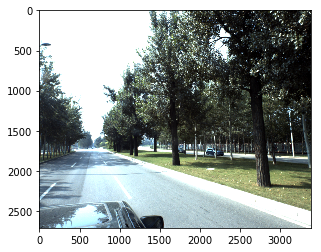

In [89]:
ccf = skimage.io.imread('ccf2.png')
sometimes = lambda aug: iaa.Sometimes(0.3, aug)
seq = iaa.Sequential([
    iaa.OneOf([
        iaa.Fliplr(0.5),
#         iaa.Flipup.5),
#         iaa.PerspectiveTransform(scale=0.125)
#         iaa.Affine(rotate=(90))
    ]),
    iaa.OneOf([
        iaa.GaussianBlur(sigma=1.2),#1.2
        iaa.AverageBlur(k=7),#7
        iaa.MedianBlur(k=7)#7
    ]),
    iaa.OneOf([
        iaa.Sharpen(lightness=1.1),#1.1
        iaa.ContrastNormalization((1.1, 1.2)),#1.1,1.2
        iaa.AddToHueAndSaturation((-5,5))#-5,5
    ])
])
seq_det = seq.to_deterministic(3)#这个是决定里面的不定项,如果一旦确定下来,seq_det其实是一个固定的变换
img = seq_det[1].augment_image(ccf)#先定deterministic

plt.imshow(img)
# skimage.io.imsave('ccf3.jpg', img)#opencv存储也是按照BGR存储的,处理需要转换,存储不要再转换了!!!!

In [72]:
import os
os.system('cp %s %s'%('ccf3.png', './log/'))

0